# **Ch 0. 초기 설정 및 라이브러리 불러오기**

In [5]:
# 구글 드라이브로부터 데이터 불러오기
# from google.colab import drive
# drive.mount('/content/gdrive')

# 변수 저장/불러오기
import pickle

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 결과 평가
from sklearn.metrics import mean_squared_error, r2_score

# 시각화
import matplotlib.pyplot as plt

In [2]:
# %cd /..
# %cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

In [14]:
# 변수 불러오기
with open("Compressor_pp.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

In [17]:
X_scaled, Y_scaled, scaler_X, scaler_Y

(array([[-1.12167725,  0.33720513, -0.92086142, ..., -1.09861889,
         -0.68200149, -0.31583513],
        [-1.12322976,  0.33720513, -0.92086142, ..., -1.09861889,
         -0.6691378 , -0.31583513],
        [-1.12504823,  0.33720513, -0.92086142, ..., -1.12090911,
         -0.67515288, -0.3485773 ],
        ...,
        [ 1.37809205,  0.33720513,  0.44388758, ...,  0.52856732,
          1.25405648, -0.36796829],
        [ 1.3774086 ,  0.33720513,  0.69052897, ...,  0.66230866,
         -0.68572225, -0.44902899],
        [ 1.37655505,  0.33720513,  0.69052897, ...,  0.66230866,
         -0.68572225, -0.44902899]]),
 array([[-0.45404795],
        [-0.4246767 ],
        [-0.39530545],
        ...,
        [ 1.03213723],
        [ 1.81928669],
        [ 2.01901118]]),
 StandardScaler(),
 StandardScaler())

# **Ch 1. Support Vector Regression (SVR)**

## Ch 1-1. 모델 생성 및 학습


In [6]:
# SVR 불러오기
from sklearn.svm import SVR

In [19]:
# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

In [22]:
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test

(array([[-0.01160745, -0.35225563, -0.62489176, ..., -0.63052423,
          1.18617196, -0.21506556],
        [ 1.3774086 ,  0.33720513,  0.69052897, ...,  0.66230866,
         -0.68572225, -0.44902899],
        [ 0.82330456, -1.04257929,  1.24958278, ..., -0.45220245,
         -0.6570217 , -1.14265425],
        ...,
        [-1.12302261,  0.33720513, -1.10995315, ..., -1.43297222,
          0.65426665, -0.49925483],
        [-0.01225071, -0.35225563, -0.87153315, ..., -1.05403844,
          1.81947439, -0.34031229],
        [-1.12481932, -0.52569945, -0.62489176, ..., -0.808846  ,
         -0.63528147, -0.40579661]]),
 array([[-0.01508353, -0.35225563,  0.69052897, ..., -0.69739489,
         -0.68572225, -1.11022997],
        [-1.12513795,  0.33720513, -1.6114573 , ..., -1.63358422,
          3.80960797,  3.29279638],
        [ 0.82018724, -1.0434422 ,  2.48278971, ..., -0.31846112,
         -0.68413255, -1.2971464 ],
        ...,
        [-0.56743099, -0.35225563, -0.54267796, ...,  

In [6]:
# SVR 학습
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
svm_model = SVR(kernel='linear')
#svm_model = SVR(kernel='rbf')
svm_model.fit(X_scaled_train, Y_scaled_train)

C:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

## Ch 1-2. 모델 평가

![MSE](https://github.com/woooky/jinwook/assets/84065529/a212b536-657b-42cc-b41b-8027a3b3b14c)

![R2](https://github.com/woooky/jinwook/assets/84065529/e3ba38b7-9c11-46a3-addc-7893bbcf76fb)

In [8]:
#import matplotlib matplotlib.use('TkAgg')

In [9]:
# 학습된 SVR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = svm_model.predict(X_scaled_train)
Y_scaled_test_pred = svm_model.predict(X_scaled_test)

In [40]:
Y_scaled_train_pred, Y_scaled_train

(array([-0.82307346,  1.5004543 ,  0.25217093, ..., -1.05090828,
        -1.17968545, -0.84236015]),
 array([[-0.76244606],
        [ 1.81928669],
        [ 0.48583201],
        ...,
        [-1.12958667],
        [-0.99741605],
        [-0.49810482]]))

In [10]:
# SVR 학습 성능 평가
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.13978209992021615
R-squared_train: 0.8570178281704296
MSE_test: 0.13262460134233223
R-squared_test: 0.8737302288514749


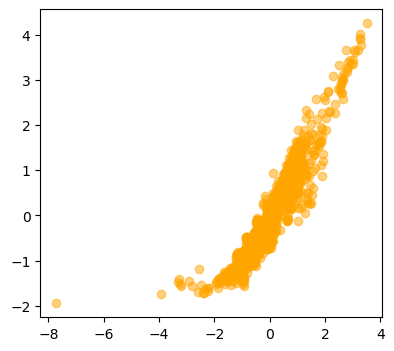

In [11]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정
# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)

ValueError: x and y must have same first dimension, but have shapes (4,) and (3, 2)

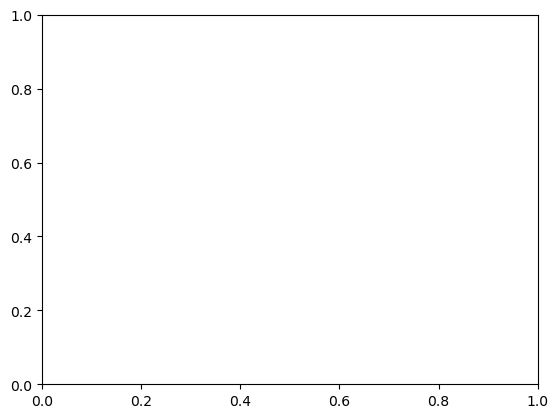

In [43]:
import numpy as np
x = [1, 2, 3, 4]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y)

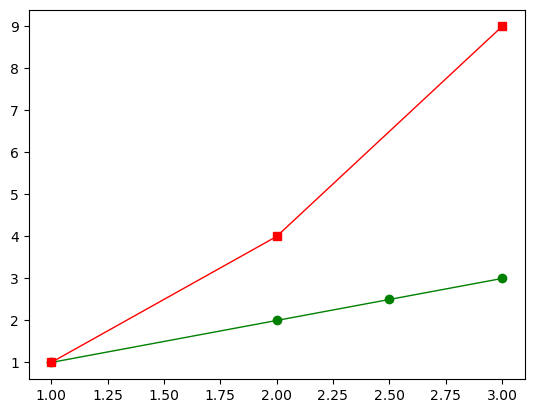

In [38]:
plt.plot([1, 2, 2.5, 3], [1, 2, 2.5, 3], 'go-', label='line 1', linewidth=1)
plt.plot([1, 2, 3], [1, 4, 9], 'rs-', label='line 2', linewidth=1)

In [82]:
max(Y_scaled_test_pred), max(Y_scaled_test)

(3.314229284869992, array([4.11318121]))

In [90]:
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
print(min_val.shape)
min_val = min_val.reshape(-1, )
print(min_val.shape)
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
print(max_val.shape)

()
(1,)
(1,)


In [ ]:
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
print(min_val.shape)
min_val = min_val.reshape(-1, )
print(min_val.shape)
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
print(max_val.shape)

In [86]:
# xlabel = min_val, max_val
# xlabel

# ylabel = min_val, max_val
# ylabel

(array([-3.95381164]), array([4.11318121]))

In [68]:
# y_train = y_train.reshape(-1, )
# print(y_train.shape)

# print(max_val.shape)
# max_val = max_val.reshape(-1, )
# print(max_val.shape)
# max_val1

# np.ravel(min_val, order='C') # by default
# np.ravel(max_val, order='C') # by default

# min_val
#max_val.tolist()


(1,)
(1,)


array([4.11318121])

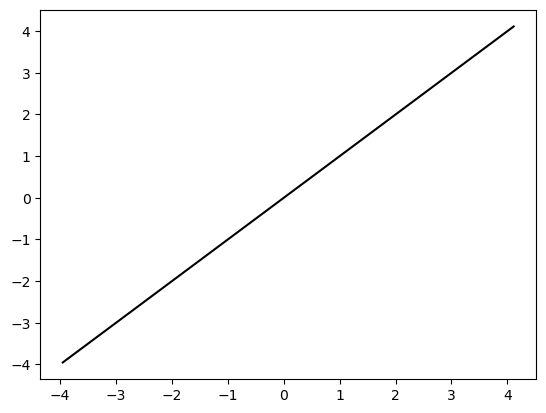

In [91]:
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')

# plt.plot('xlabel', 'ylabel', color='black', linestyle='-', data=obj)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

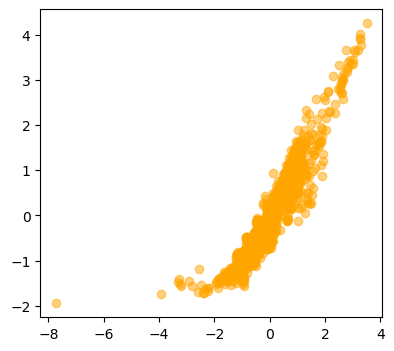

In [92]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

## Ch 1-3. 임의의 input에 대한 output 예측

In [ ]:
# 알고싶은 input
X_unknown=[-15, 3000, -0.1, -20, 2.1, 1.2, 4.0]

# input 스케일링
X_unknown_scaled=scaler_X.transform([X_unknown])

# 예측
y_pred_unknown =  svm_model.predict(X_unknown_scaled)
print(y_pred_unknown)

# **Ch 2. Random Forest Regression (RFR)**


## Ch 2-1. 모델 생성 및 학습

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rfr_model = RandomForestRegressor(n_estimators=5, random_state=42)

rfr_model.fit(X_scaled_train, Y_scaled_train)

NameError: name 'X_scaled_train' is not defined

## Ch 2-2. 모델 평가

In [ ]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model.predict(X_scaled_test)

In [ ]:
# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

In [ ]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

## Ch 2-3. 결정트리 시각화

In [ ]:
# 결정트리 시각화
import graphviz
from sklearn import tree

In [ ]:
# 개별 트리 시각화
for i, estimator in enumerate(rfr_model.estimators_):
    dot_data = tree.export_graphviz(estimator, out_file=None,
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.view(filename=f"tree_{i+1}")

In [ ]:
display(graphviz.Source(dot_data))

## Ch 2-4. 임의의 input에 대한 output 예측

In [ ]:
# 알고싶은 input
X_unknown=[-15, 3000, -0.1, -20, 2.1, 1.2, 4.0]

# input 스케일링
X_unknown_scaled=scaler_X.transform([X_unknown])

# 예측
y_pred_unknown =  rfr_model.predict(X_unknown_scaled)
print(y_pred_unknown)

# **Ch 3. Deep Neural Network (DNN)**


## Ch 3-1. 모델 생성 및 학습

In [ ]:
import tensorflow as tf

In [ ]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
dnn_model.compile(loss='mean_squared_error', optimizer='adam')

hist=dnn_model.fit(X_scaled_train, Y_scaled_train, epochs=50, batch_size=32, verbose=1)

## Ch 3-2. 모델 평가

In [ ]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model.predict(X_scaled_test)

In [ ]:
# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

In [ ]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

In [ ]:
# 손실 그래프
plt.plot(hist.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()